# Régression linéaire

Implémenter votre propre algorithme de régression linéaire sur le jeu de données donnés ci-après.

Effectuer une régression linéaire sur le jeu de données (donnés ci-après) en utilisant au choix la librairie `Numpy`.

Les résultats attendus sont
- le graphique avec les points du jeu de données et la droite de régression calculée,
- le coefficient directeur de la droite calculée,
- l'ordonnée à l'origine de la droite calculée,
- le coefficient de corrélation,
- le coefficient de détermination,
- l'erreur quadratique moyenne.

Effectuer l'affichage des différents résultats en utilisant au choix les librairies :
- Matplotlib,
- Seaborn,
- Plotly

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import math

## Génération du jeu de données

In [2]:
n = 100  # nombre de points

a = 2.0 # coefficient directeur de la droite
b = 1.0 # ordonnée à l'origine

np.random.seed(1234)

noise = np.random.normal(loc=0.0, scale=100.0, size=n) # bruit

x = 1000.0*np.random.random(n)

y = a * x + b

y = y + noise

## Affichage du jeu de données

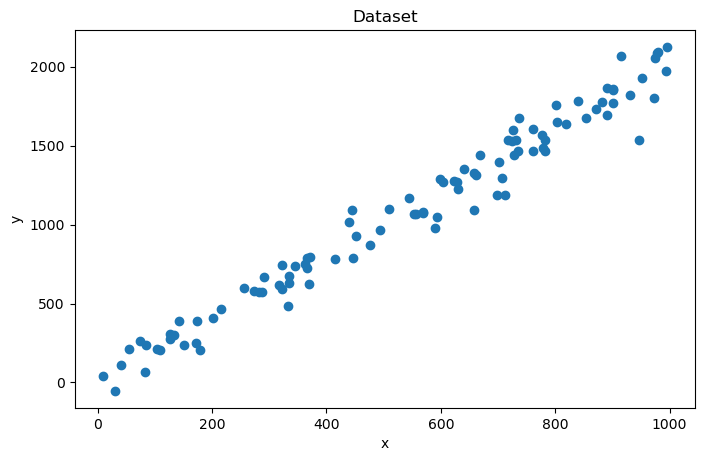

In [3]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("Dataset")
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## coefficient directeur de la droite calculée

In [39]:
x_mean = np.mean(x) # moyenne de x
x_mean

543.1644987889281

In [40]:
y_mean = np.mean(y) # moyenne de y
y_mean

1090.8402258903998

In [41]:
#coef_direct = ((x - x_mean)*(y - y_mean)).sum() / ((x - x_mean)**2).sum()
coef_direct = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
coef_direct

2.0066868027645923

In [42]:
ordonnee_origine = y_mean - coef_direct * x_mean
ordonnee_origine

0.8791944404133574

## affichage la droite de régression calculée

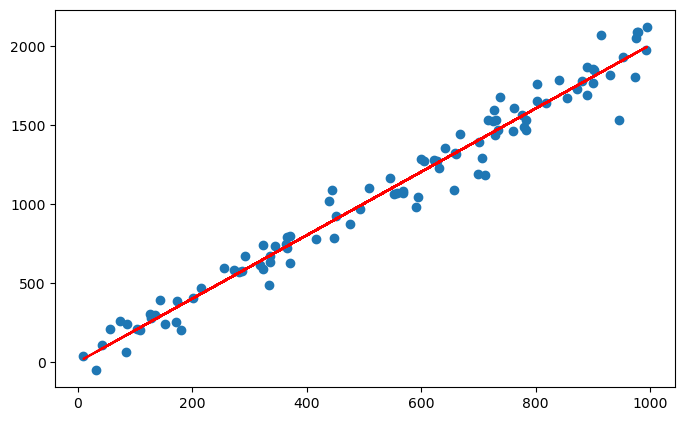

In [43]:
plt.figure(figsize=(8, 5), dpi=100)
poly1d_fn = np.poly1d([coef_direct, ordonnee_origine]) #calcul pour la ligne
plt.plot(x, y, 'o', x, poly1d_fn(x), "-r")
#plt.plot(x, y, 'o', x, coef_direct*x+ordonnee_origine, "-r")
plt.show()

## coefficient de corrélation

In [35]:
xy_covariance = np.sum((x - x_mean) * (y - y_mean))  # covariance entre x et y
xy_covariance

16435399.854260169

In [34]:
x_variance = np.sum((x - x_mean)**2)
x_variance

8190316.411917038

In [33]:
x_root = np.sqrt(x_variance) # racine carrée de variance de x
x_root

2861.8728853527086

In [32]:
y_variance = np.sum((y - y_mean)**2)
y_variance

33971722.09055995

In [31]:
y_root = np.sqrt(y_variance) # racine carrée de variance de y
y_root

5828.526579724927

In [14]:
r = xy_covariance / (x_root * y_root) # coefficient de corrélation 
r

0.9853060583448754

In [15]:
r_2 = np.corrcoef(x, y) # verification de coefficient de corrélation avec np.corrcoef(x, y)
r_2[0, 1]

0.9853060583448756

## coefficient de détermination

In [26]:
y_predict = coef_direct * x + ordonnee_origine # valeur théorique (prédict) de y
y_predict

array([1810.50142951, 1418.65993526, 1459.05513937, 1807.0735779 ,
       1564.41691064, 1203.19518549,  585.07638133,  304.68207353,
        673.46975958, 1320.3796678 ,  148.05470883,  111.25980217,
        649.42996226, 1185.79123873, 1714.38617999,  576.92357426,
        348.17091448,  269.81777981, 1996.8379057 ,  361.07520023,
        638.09621347, 1141.26205629,   19.63885551, 1808.19889644,
       1961.89667699, 1118.39239759,  170.9937472 ,  669.11084771,
       1462.60740607,  286.70237837, 1109.51132427,  548.79150023,
       1956.3857274 , 1340.91836606,  513.89527041,  218.2264404 ,
       1558.43080819, 1571.06745564, 1529.17971822, 1835.79985424,
       1322.52883896, 1141.4149195 ,  405.73967987, 1402.14131568,
       1911.63715697, 1786.75677769, 1994.65770916, 1643.76072374,
       1094.76865121,  906.40475123, 1787.94855056, 1953.91680637,
       1191.6698781 ,  735.47605784,  649.22905086, 1749.55273997,
        433.58922287, 1475.68400508,  734.5621919 , 1609.44454

In [30]:
R2 = 1 - np.sum((y - y_predict)**2) / np.sum((y - y_mean)**2) #bon method, il faut utiliser pour coefficient de détermination 
R2

0.9708280286111148

In [18]:
correlation_matrix = np.corrcoef(y, y_predict) #verification de coefficient de détermination => éviter car r² != R²
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.970828028611114

In [19]:
np.corrcoef(y, y_predict)[0,1]**2 #éviter

0.970828028611114

## l'erreur quadratique moyenne

In [29]:
mse =np.sum((y_predict - y)**2) / n # l'erreur quadratique moyenne
mse

9910.221048569721

In [21]:
mse_fn = np.mean((y - y_predict) ** 2) #vérification avec numpy
print(mse_fn)

9910.221048569721


In [28]:
#root_mse = math.sqrt(mse) # racine carré de l'érreur quadratique moyenne
root_mse = np.sqrt(mse)
root_mse

99.55009316203437